<a href="https://colab.research.google.com/github/agnesrm/dados/blob/main/Regressao_Arvores_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arvores de Decisão - Regressão

Base de dados utilizada: 
1. Carregamento de dados
2. O valor esperado de saída é **actual**
3. Remover as colunas 'year', 'month', 'day', 'week' pois não vamos considerar dados históricos relacionados a série temporal
2. Análise descritiva dos dados
2. Remoção de campos desnecessários
4. Tratamento de dados nulos e/ou faltantes
5. Separação dos dados, holdout
6. Normalização dos dados 
7. Treinamento de modelos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Obtenha os dados
** Leia o arquivo csv 'BostonHousing.csv' em um DataFrame **

In [ ]:
df = pd.read_csv('temps.csv')

** Verifique o cabeçalho do DataFrame.**

In [ ]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [ ]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


Remoção das colunas year,	month, day e week, pois não vamos trabalhar com a série temporal

In [ ]:
df.drop(columns=['year', 'month', 'day', 'week'], inplace=True)

## Estatística Descritiva

Dados faltantes

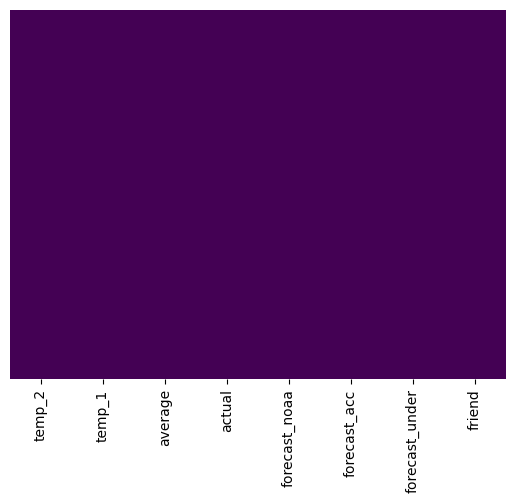

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

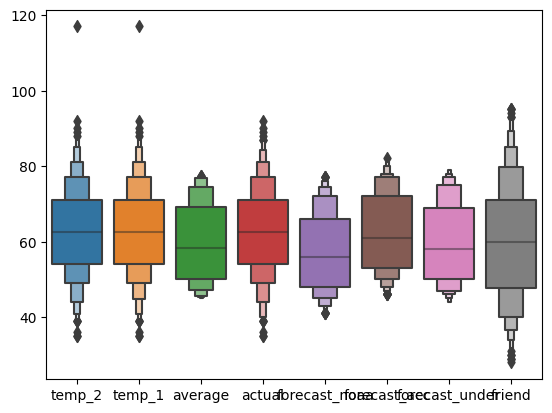

In [ ]:
sns.boxenplot(df)
plt.show()

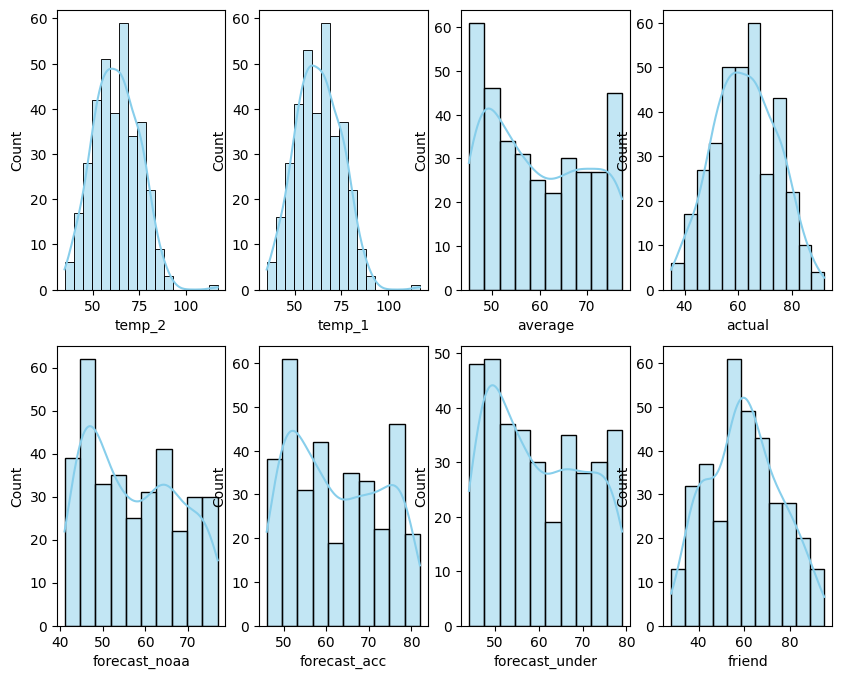

In [ ]:
import math
linha = 0
coluna = 0
total_coluna = int(len(df.columns)/2)
total_linha = math.ceil(len(df.columns) / total_coluna)
fig, axs = plt.subplots( total_linha, total_coluna,  figsize=(10,8))

for col in df.columns:
    sns.histplot(data=df, x=col, kde=True, color="skyblue", ax=axs[linha, coluna])
    if(coluna < total_coluna -1):
      coluna = coluna + 1
    else:
      coluna = 0
      linha = linha + 1 


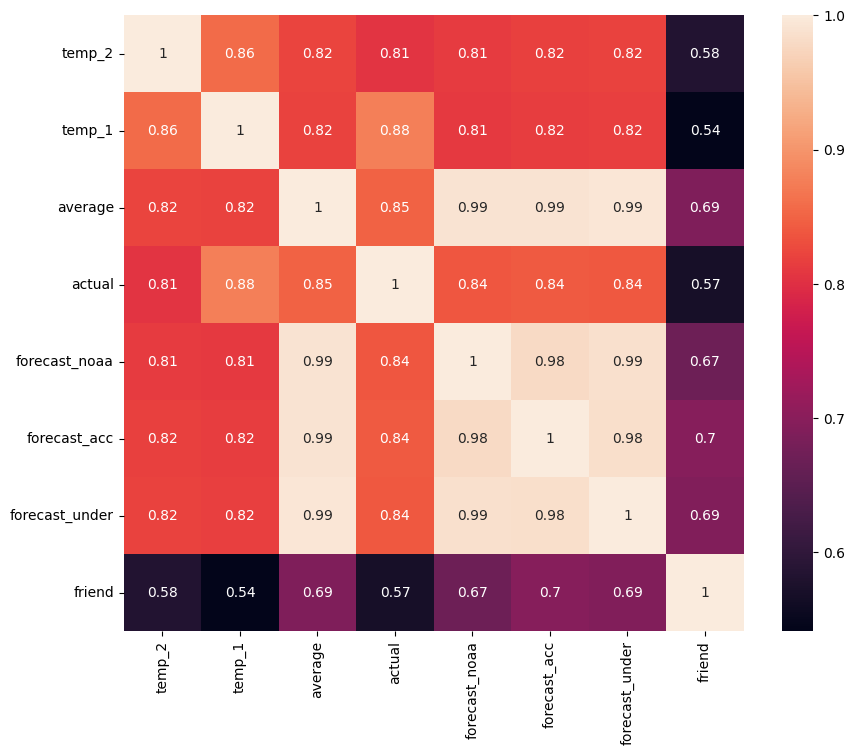

In [ ]:
fig, axs = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Separação dos dados, holdout

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['actual']),
                                                    df['actual'],
                                                    test_size=0.3,
                                                    random_state=111)

In [ ]:
pd.DataFrame(X_train)

,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend
154,81,92,68.2,65,70,67,71
55,61,60,51.2,51,53,53,61
61,59,57,52.1,49,53,51,46
277,58,62,57.8,56,60,59,44
146,64,64,67.0,65,71,65,76
...,...,...,...,...,...,...,...
169,70,76,70.8,68,75,71,57
275,60,61,58.4,58,60,57,41
86,56,64,55.7,51,57,56,57
212,77,73,77.3,77,81,77,93


## Normalização dos dados 

Hora de para padronizar as variáveis.

Import StandardScaler do Scikit-learn.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

Converta as variáveis independentes com o StandardScaler 

In [ ]:
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

Use o método .transform () para transformar os parâmetros em uma versão padronizada.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 154 to 340
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_2          243 non-null    int64  
 1   temp_1          243 non-null    int64  
 2   average         243 non-null    float64
 3   forecast_noaa   243 non-null    int64  
 4   forecast_acc    243 non-null    int64  
 5   forecast_under  243 non-null    int64  
 6   friend          243 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 15.2 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 49 to 329
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_2          105 non-null    int64  
 1   temp_1          105 non-null    int64  
 2   average         105 non-null    float64
 3   forecast_noaa   105 non-null    int64  
 4   forecast_acc    105 non-null    int64  
 5   forecast_under  105 non-null    int64  
 6   friend          105 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 6.6 KB


## Árvores de Decisão

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decision_tree = DecisionTreeRegressor(random_state=0)

### Executar o modelo treinado na base de treinamento

In [ ]:
decision_tree.fit(x_train_scaled, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
# treino
decision_tree.score(x_train_scaled, y_train)

1.0

In [ ]:
# teste
decision_tree.score(x_test_scaled, y_test)

0.6632323662884085

### Avaliação de Regressores - Exibir os Resultados

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [ ]:
def print_metrics(y_test, y_test_pred):
  print("MEAN: ", mean_absolute_error(y_test, y_test_pred))
  print("MAPE: ", mean_absolute_percentage_error(y_test, y_test_pred))
  print("MSE: ", mean_squared_error(y_test, y_test_pred))
  print("RMSE: ", mean_squared_error(y_test, y_test_pred)**2)
  print("R²: ", r2_score(y_test, y_test_pred))

In [ ]:
y_test_pred = decision_tree.predict(x_test_scaled)
print_metrics(y_test, y_test_pred)

MEAN:  4.9904761904761905
MAPE:  0.08038286049120882
MSE:  47.00952380952381
RMSE:  2209.8953287981863
R²:  0.6632323662884085


## Validação cruzada com o algoritmo Árvores de Decisão

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
reg_cv_scores = cross_validate(decision_tree, x_train_scaled, y_train,cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (reg_cv_scores['test_score'].mean(), reg_cv_scores['test_score'].std()))

0.71 accuracy with a standard deviation of 0.08


In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (reg_cv_scores['test_score'].mean(), reg_cv_scores['test_score'].std()))

0.69 accuracy with a standard deviation of 0.10


### Exiba a árvore de decisão do modelo treinado

In [ ]:
from sklearn import tree

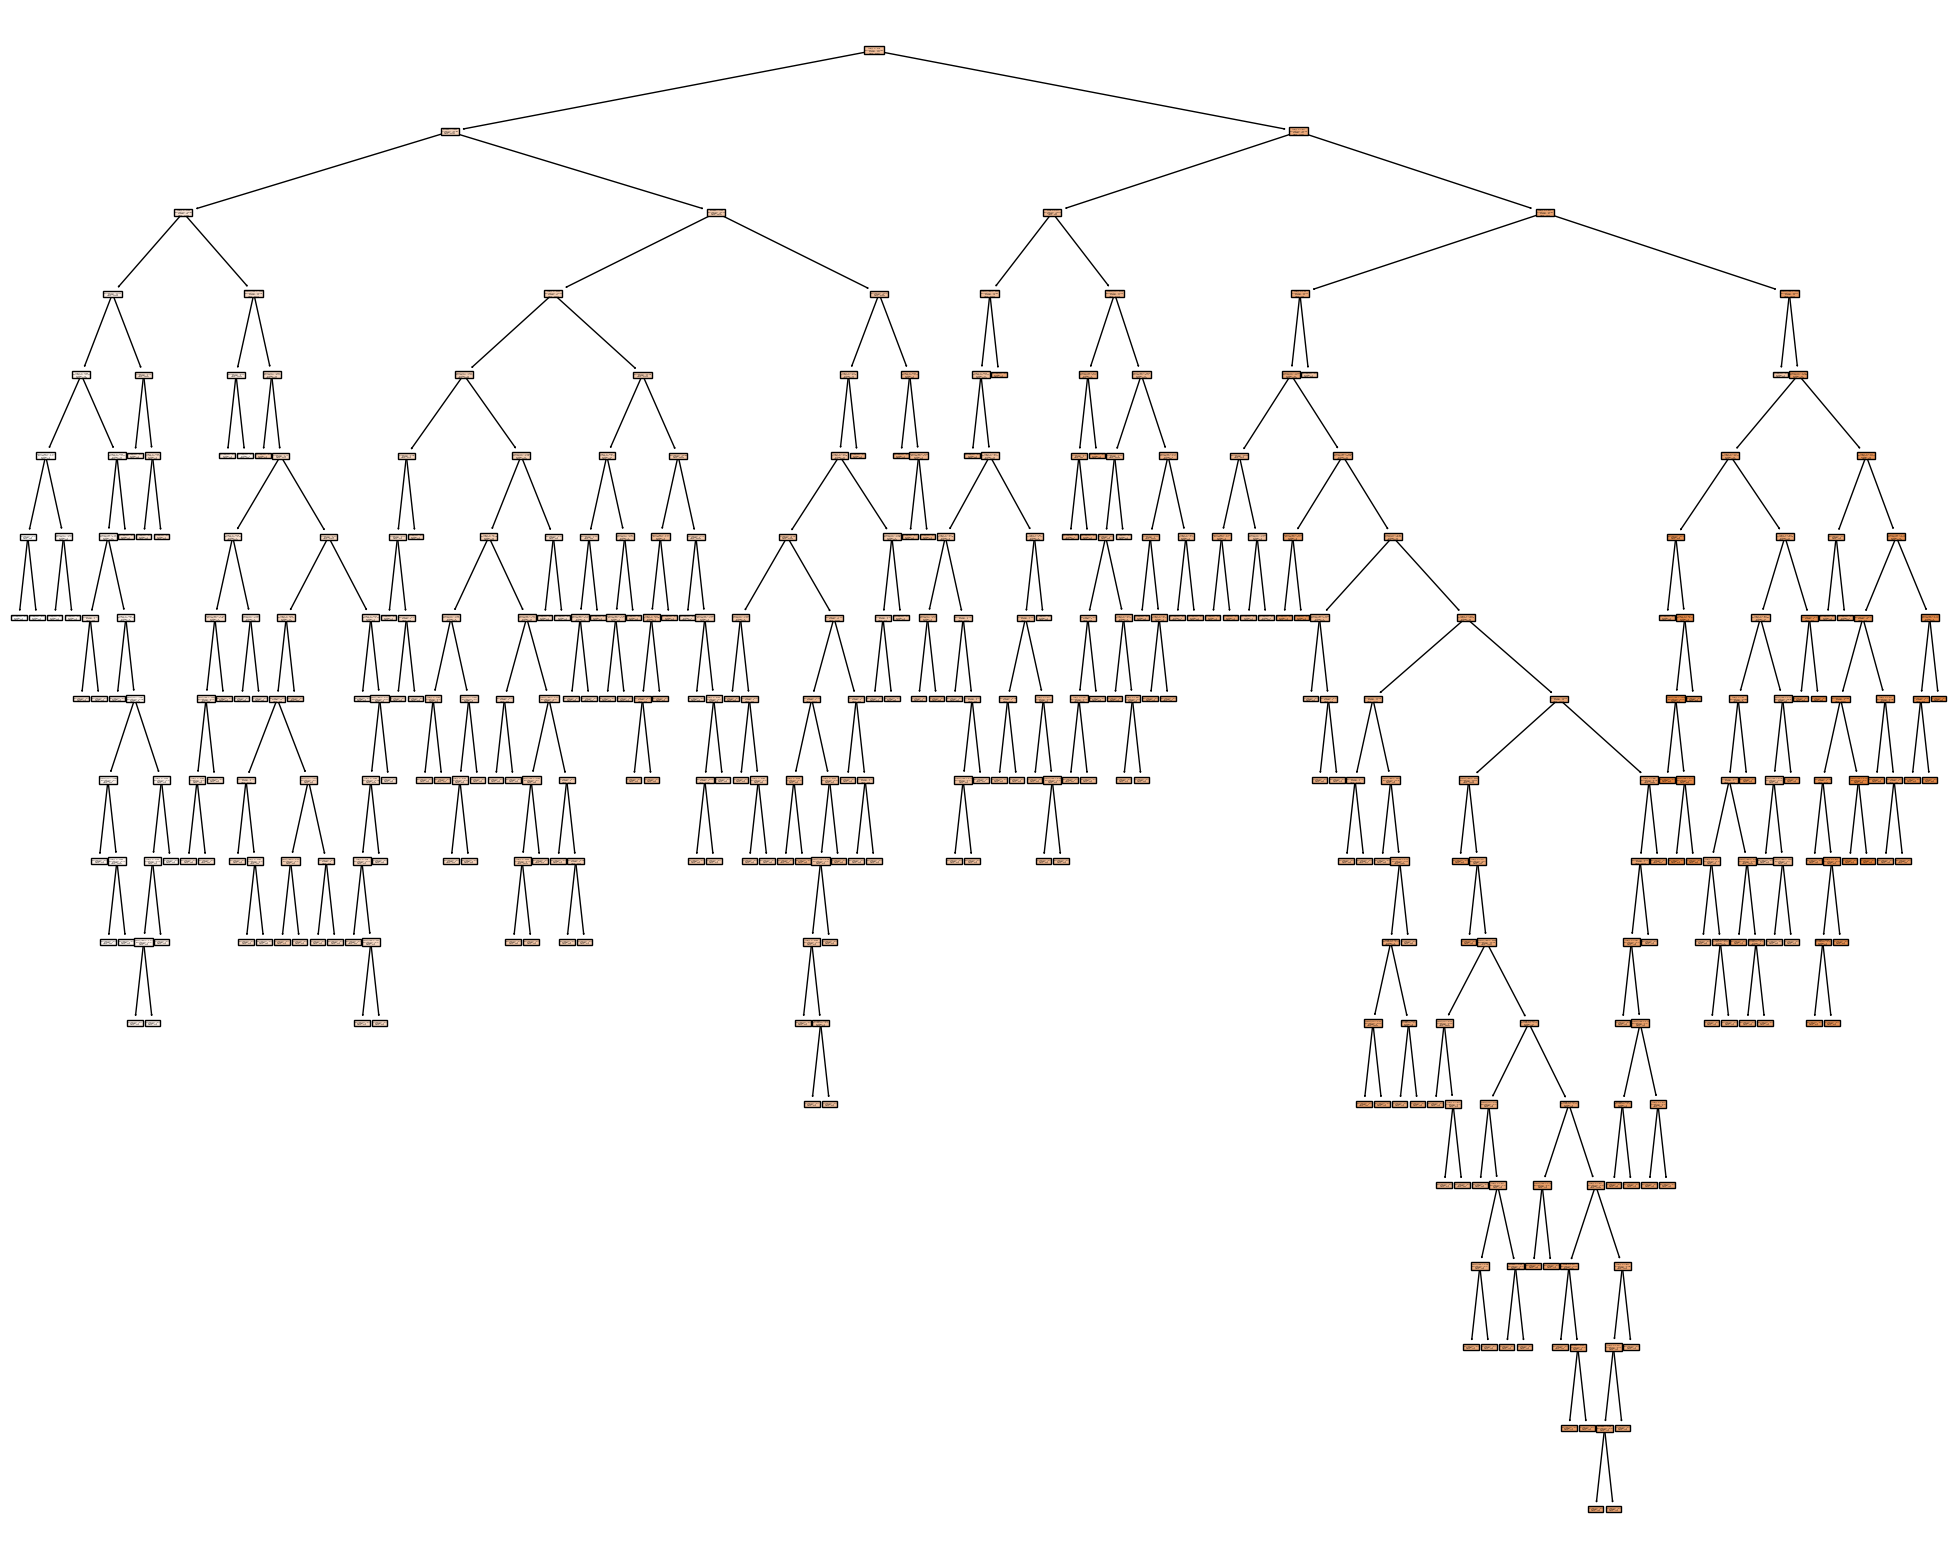

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree, 
                   feature_names=X_train.columns,  
                   class_names=y_test.unique(),
                   filled=True)

### Avaliar o melhor valor de max_depth

Text(0, 0.5, 'Score Rate')

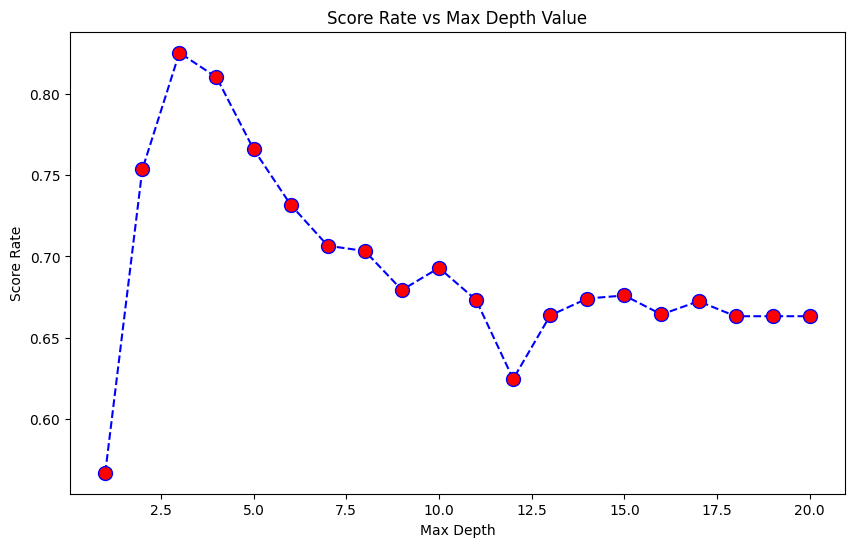

In [ ]:
import numpy as np

score = []

for i in range(1,21):
  decision_tree = DecisionTreeRegressor(random_state=0, max_depth=i)
  decision_tree.fit(x_train_scaled, y_train)
  valor = decision_tree.score(x_test_scaled, y_test)
  score.append(valor)

plt.figure(figsize=(10,6))
plt.plot(range(1,21), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Score Rate vs Max Depth Value')
plt.xlabel('Max Depth')
plt.ylabel('Score Rate')

### Criar um regressor com o melhor valor para max_depth e avalie





In [ ]:
reg_best = DecisionTreeRegressor(max_depth=score.index(max(score))+1)

reg_best.fit(x_train_scaled, y_train)
print('Train: ', reg_best.score(x_train_scaled, y_train))
print('Test: ',reg_best.score(x_test_scaled, y_test))

Train:  0.8412076385562377
Test:  0.8252012697176424


In [ ]:
print_metrics(y_test, reg_best.predict(x_test_scaled))

MEAN:  3.9606007864016397
MAPE:  0.06453528235660878
MSE:  24.400222142844786
RMSE:  595.370840620173
R²:  0.8252012697176424


### Plot dos valores previstos vs reais

In [ ]:
y_pred = reg_best.predict(x_test_scaled)

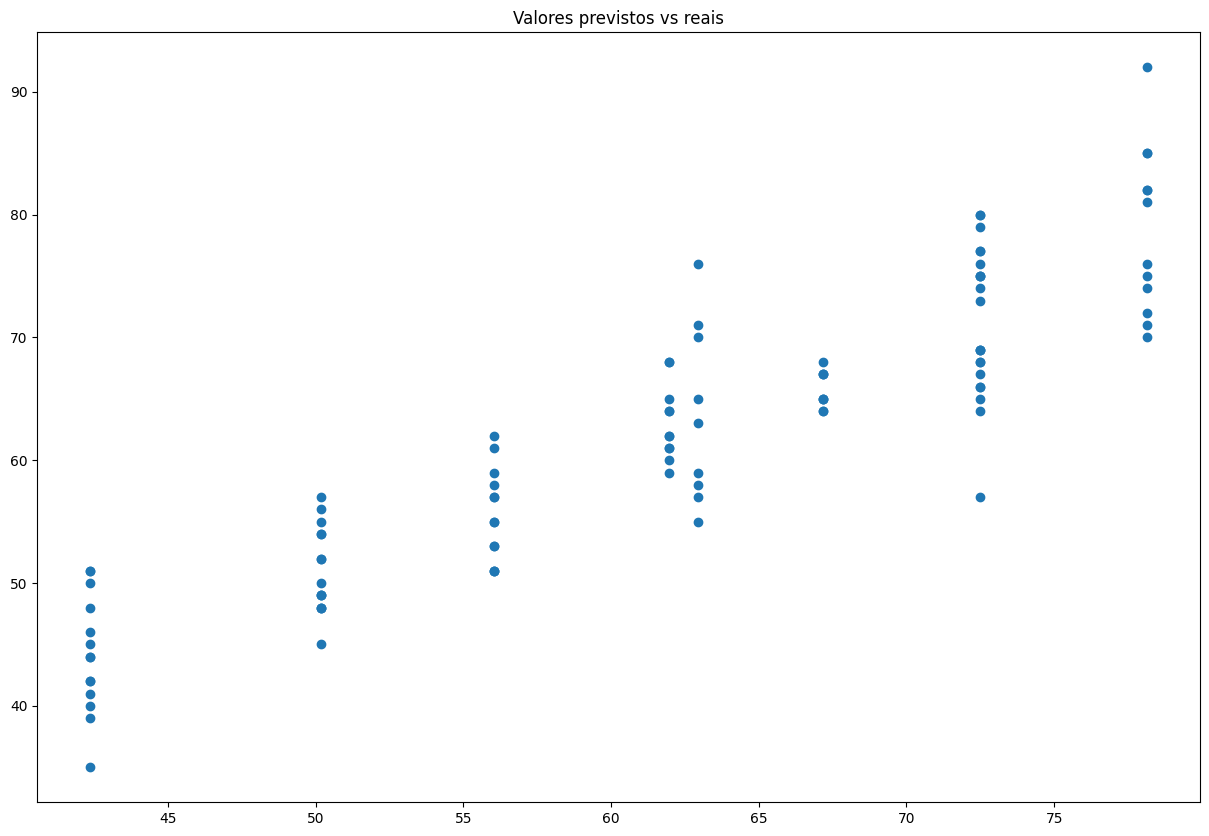

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_test)
plt.title('Valores previstos vs reais')
plt.show()

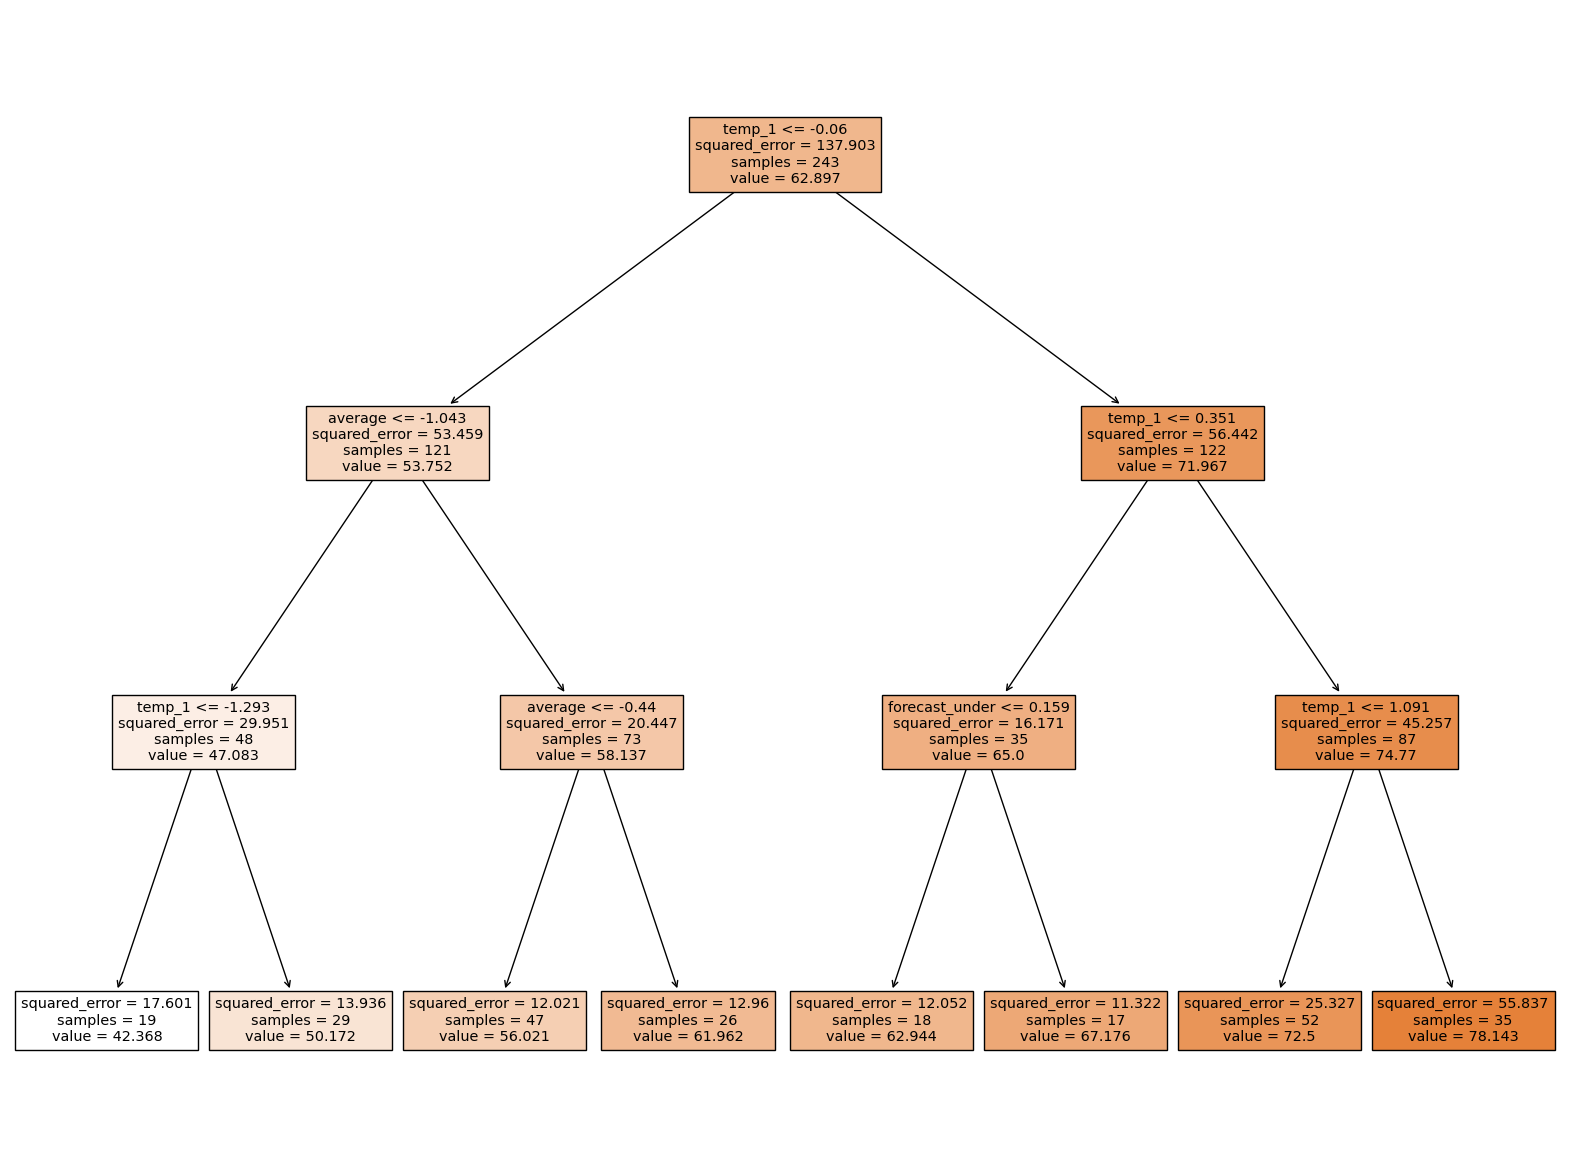

In [ ]:
fig = plt.figure(figsize=(20,15))
plt.title('Melhor regressor')
_ = tree.plot_tree(reg_best, 
                   feature_names=df.columns,  
                   class_names=y_test.unique(),
                   filled=True)